## Resources:
- https://thegymter.net/nation-database/
- https://www.kaggle.com/code/jlove5/olympic-data-women-s-gymnastics/notebook
- https://themedalcount.com/data-hub/

1. Difficulty Score (D-score): This score is based on the difficulty and complexity of the skills performed in the routine. Each skill in gymnastics has a specific value, and the most difficult skills are worth more points. The D-score also takes into account the connections between skills and the overall composition of the routine. There is no maximum limit to the D-score, which encourages gymnasts to attempt more difficult routines.

2. Execution Score (E-score): This score starts at a 10 and deductions are made for errors in execution, technique, and artistry. Deductions can be made for a variety of reasons, including poor form, lack of control, falls, and stepping out of bounds.

3. Penalties: In addition to the D-score and E-score, gymnasts can also receive penalties for certain infractions, such as going over time on floor exercise or stepping out of bounds.

The D-score and E-score lie at the heart of scores in gymnastics. The D-score rewards difficulty, while the E-score penalizes mistakes. The D-score and E-score are added together to give the final score, which means that the final score can be higher than 10, and it’s common to see scores in the range of 12 to 16 in elite gymnastics. This system rewards gymnasts who perform more difficult skills and combinations, but it also means that a perfect score (as was possible under the old system) is no longer achievable.

https://gymnasticscrown.com/scores-in-gymnastics/#The_Open-Ended_Scoring_System

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import random
from itertools import combinations

In [66]:
df = pd.read_csv('data_2017_2021.csv')

### Feature Engineering & Clean Data:

    - drop duplicates
    - combine first and last names and drop originals
    - fill missing scores
    - create total score (combining all scores)
    - create gold medal
    

In [10]:
df.drop_duplicates(inplace=True)
df['Name'] = df['FirstName'] + " " + df['LastName']
df = df.drop(columns=["LastName", "FirstName"])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
fill_columns = ['Rank', 'D_Score', 'E_Score', 'Score']
df[fill_columns] = df[fill_columns].fillna(0)
df["Penalty"] = df["Penalty"].fillna(0)
df['Total_Score'] = df['D_Score'] + df['E_Score'] - df['Penalty']
gold_medal_count = df[df['Rank'] == 1].groupby(['Name']).size().reset_index(name='Gold_Medals')
df = df.merge(gold_medal_count, on=['Name'], how='left')
df['Gold_Medals'] = df['Gold_Medals'].fillna(0)

In [13]:
df.head(2)

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score,Gold_Medals
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL,11.566,0.0
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.6,7.633,0.0,12.233,HADI ABDUL,12.233,0.0


In [16]:
df

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score,Gold_Medals
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL,11.566,0.0
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.6,7.633,0.0,12.233,HADI ABDUL,12.233,0.0
2,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.1,6.500,0.0,11.600,HADI ABDUL,11.600,0.0
3,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.6,8.566,0.0,13.166,HADI ABDUL,13.166,0.0
4,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,Farah Ann ABDUL HADI,11.566,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,w,FRA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,19.0,5.4,9.166,0.1,14.466,JESUS de,14.466,0.0
761,w,NED,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,75.0,4.7,6.900,0.0,11.600,POL van,11.600,0.0
762,w,NED,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,33.0,4.9,8.000,0.0,12.900,POL van,12.900,0.0
763,w,NED,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,41.0,5.3,7.833,0.0,13.133,POL van,13.133,0.0


In [67]:
df['Date'].unique()

array(['SUN 25 JUL 2021', '25 July 2021', '1 Aug 2021', 'THU 29 JUL 2021'],
      dtype=object)

In [22]:
df["Apparatus"].unique()


array(['BB', 'FX', 'UE', 'VT', 'VT1', 'VT2'], dtype=object)

In [12]:
# Group by 'Apparatus' and get the top ten scores for each apparatus
top_scores = df.groupby('Apparatus').apply(lambda x: x.nlargest(10, 'Score')).reset_index(drop=True)

top_scores

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score,Gold_Medals
0,w,CHN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,1.0,6.9,8.033,0.0,14.933,Chenchen GUAN,14.933,2.0
1,w,CHN,2021-08-01,Olympic Games,final,"Tokyo, Japan",BB,1.0,6.6,8.033,0.0,14.630,Chenchen GUAN,14.633,2.0
2,w,CHN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,2.0,6.2,8.133,0.0,14.333,Xijing TANG,14.333,0.0
3,w,CHN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,2.0,6.2,8.133,0.0,14.333,Xijing TANG,14.333,0.0
4,w,CHN,2021-08-01,Olympic Games,final,"Tokyo, Japan",BB,2.0,6.0,8.233,0.0,14.230,Xijing TANG,14.233,0.0
5,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.2,8.000,0.0,14.200,Sunisa LEE,14.200,1.0
6,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.2,8.000,0.0,14.200,Sunisa LEE,14.200,1.0
7,w,ROC,2021-07-29,Olympic Games,final,"Tokyo, Japan",BB,1.0,5.9,8.300,0.0,14.200,Vladislava URAZOVA,14.200,1.0
8,w,ROU,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,4.0,6.2,7.933,0.0,14.133,Larisa Andreea IORDACHE,14.133,0.0
9,w,CAN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,6.0,6.3,7.800,0.0,14.100,Elsabeth BLACK,14.100,0.0


In [38]:
top_three = df.groupby('Apparatus').apply(lambda x: x.nlargest(3, 'Score')).reset_index(drop=True)

top_three

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score,Gold_Medals
0,w,CHN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,1.0,6.9,8.033,0.0,14.933,Chenchen GUAN,14.933,2.0
1,w,CHN,2021-08-01,Olympic Games,final,"Tokyo, Japan",BB,1.0,6.6,8.033,0.0,14.630,Chenchen GUAN,14.633,2.0
2,w,CHN,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,2.0,6.2,8.133,0.0,14.333,Xijing TANG,14.333,0.0
3,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",FX,1.0,6.3,8.066,0.0,14.360,Jade CAREY,14.366,1.0
4,w,ITA,2021-08-01,Olympic Games,final,"Tokyo, Japan",FX,2.0,5.9,8.300,0.0,14.200,Vanessa FERRARI,14.200,1.0
5,w,ITA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,1.0,5.9,8.266,0.0,14.166,Vanessa FERRARI,14.166,1.0
6,w,BEL,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,1.0,6.7,8.666,0.0,15.366,Nina DERWAEL,15.366,3.0
7,w,BEL,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,1.0,6.7,8.666,0.0,15.366,Nina DERWAEL,15.366,3.0
8,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",UE,1.0,6.8,8.500,0.0,15.300,Sunisa LEE,15.300,1.0
9,w,BRA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,1.0,6.0,9.400,0.0,15.400,Rebeca ANDRADE,15.400,4.0


In [35]:
df['Country'].value_counts()

Country
USA    64
ROC    59
GBR    40
JPN    39
CAN    39
CHN    38
GER    37
FRA    37
BEL    37
ITA    35
ESP    32
NED    27
KOR    22
BRA    20
RSA    16
AUS    14
EGY    14
SUI    13
MEX    11
HUN    11
POL     9
AZE     9
ISR     9
ROU     8
PER     7
MAS     7
TUR     7
CAY     7
IRL     7
BLR     7
UKR     7
IND     7
CZE     7
SVK     7
POR     7
ARG     7
AUT     7
SRI     7
CHI     7
CRC     7
CRO     2
UZB     2
SGP     2
TPE     2
CUB     2
SWE     1
JAM     1
NOR     1
Name: count, dtype: int64

In [33]:
top_scores['Country'].value_counts()

Country
USA    22
ROC     8
BRA     7
CHN     5
BEL     4
CAN     3
KOR     3
MEX     3
ITA     2
ROU     1
JPN     1
FRA     1
Name: count, dtype: int64

In [39]:
top_three['Country'].value_counts()

Country
USA    5
BRA    5
CHN    3
ITA    2
BEL    2
KOR    1
Name: count, dtype: int64

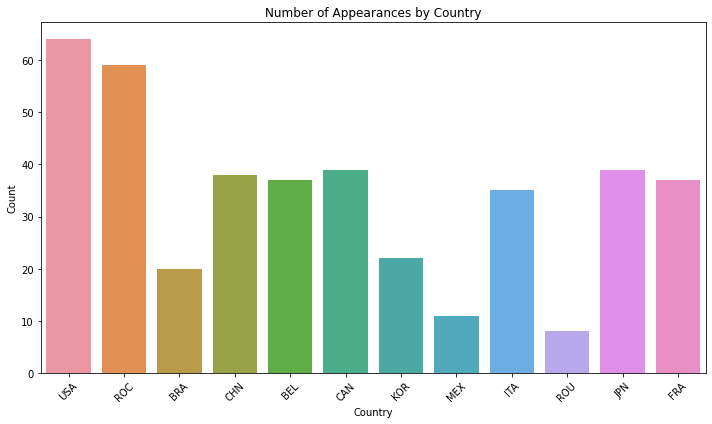

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=top_scores['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Appearances by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

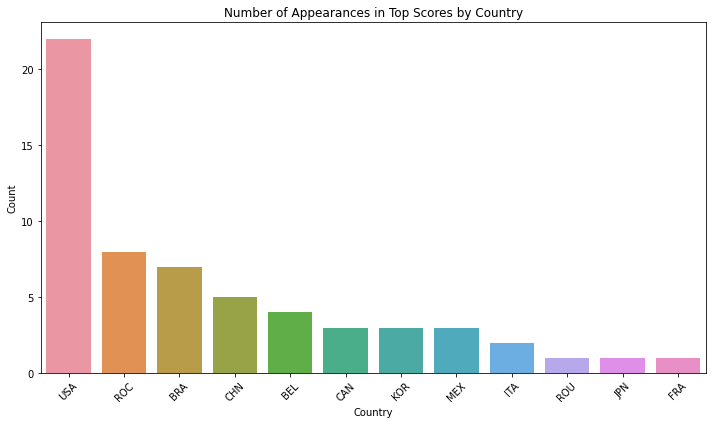

In [34]:
# Assuming your top_scores DataFrame is already defined
plt.figure(figsize=(10, 6))
sns.countplot(data=top_scores, x='Country', order=top_scores['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Appearances in Top Scores by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

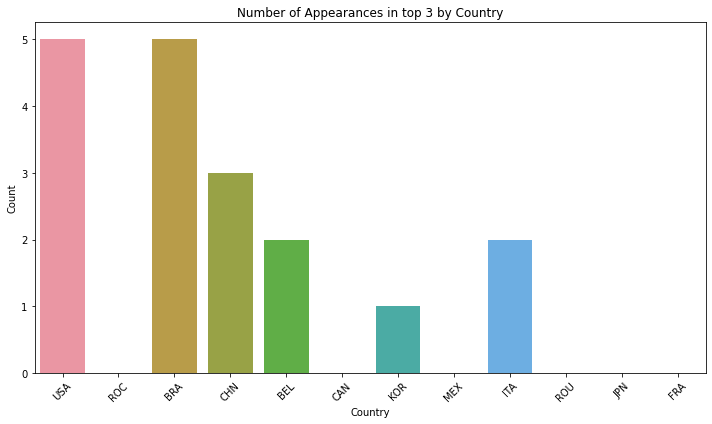

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_three, x='Country', order=top_scores['Country'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Appearances in top 3 by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

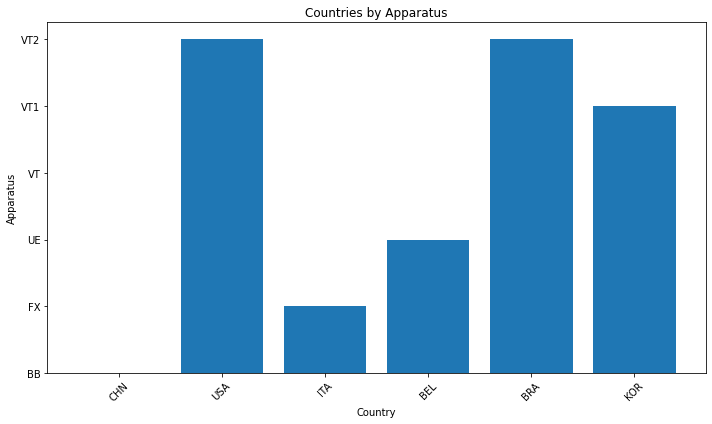

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(top_three['Country'], top_three['Apparatus'])
plt.xlabel('Country')
plt.ylabel('Apparatus')
plt.title('Countries by Apparatus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

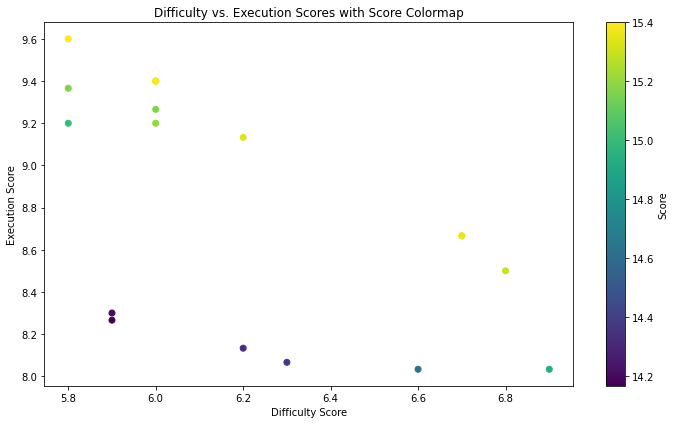

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(top_three['D_Score'], top_three['E_Score'], c=top_three['Score'], cmap='viridis')
plt.colorbar(label='Score')
plt.xlabel('Difficulty Score')
plt.ylabel('Execution Score')
plt.title('Difficulty vs. Execution Scores with Score Colormap')
plt.tight_layout()
plt.show()


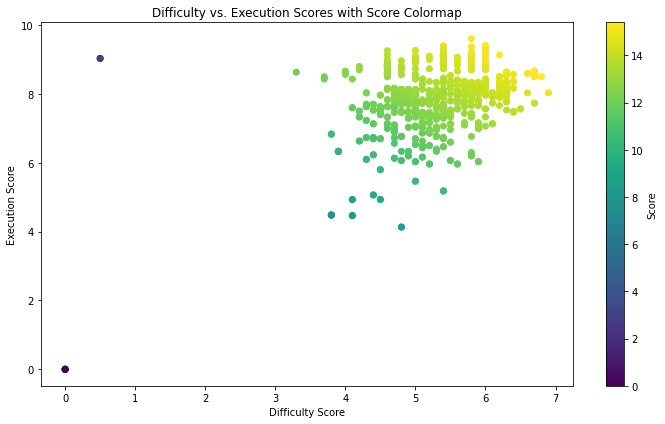

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['D_Score'], df['E_Score'], c=df['Score'], cmap='viridis')
plt.colorbar(label='Score')
plt.xlabel('Difficulty Score')
plt.ylabel('Execution Score')
plt.title('Difficulty vs. Execution Scores with Score Colormap')
plt.tight_layout()
plt.show()

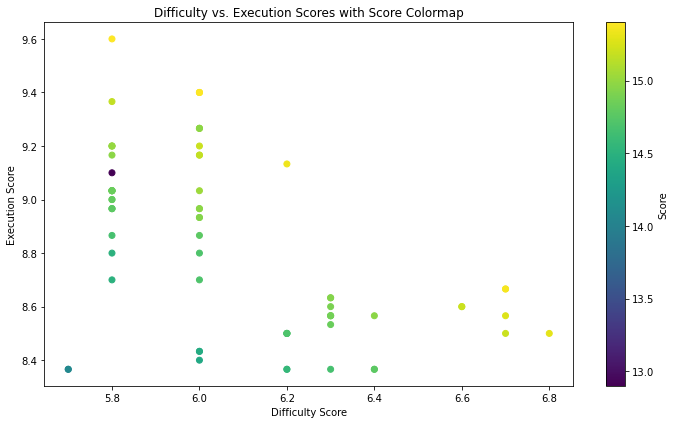

In [65]:
# Calculate the cutoff value for the upper quartile (75th percentile) for D_Score
cutoff_d_score = df['D_Score'].quantile(0.75)

# Calculate the cutoff value for the upper quartile (75th percentile) for E_Score
cutoff_e_score = df['E_Score'].quantile(0.75)

# Keep values above the cutoffs for both D_Score and E_Score
df_top_scores = df[(df['D_Score'] >= cutoff_d_score) & (df['E_Score'] >= cutoff_e_score)]


plt.figure(figsize=(10, 6))
plt.scatter(df_top_scores['D_Score'], df_top_scores['E_Score'], c=df_top_scores['Score'], cmap='viridis')
plt.colorbar(label='Score')
plt.xlabel('Difficulty Score')
plt.ylabel('Execution Score')
plt.title('Difficulty vs. Execution Scores with Score Colormap')
plt.tight_layout()
plt.show()


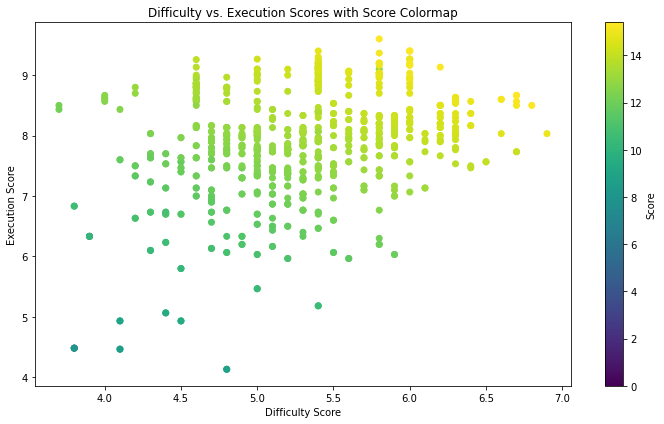

In [58]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Calculate the IQR for the 'D_Score' column
Q1 = df['D_Score'].quantile(0.25)
Q3 = df['D_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_cleaned = df[(df['D_Score'] >= lower_bound)]

# print(df_cleaned)

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['D_Score'], df_cleaned['E_Score'], c=df_cleaned['Score'], cmap='viridis')
plt.colorbar(label='Score')
plt.xlabel('Difficulty Score')
plt.ylabel('Execution Score')
plt.title('Difficulty vs. Execution Scores with Score Colormap')
plt.tight_layout()
plt.show()

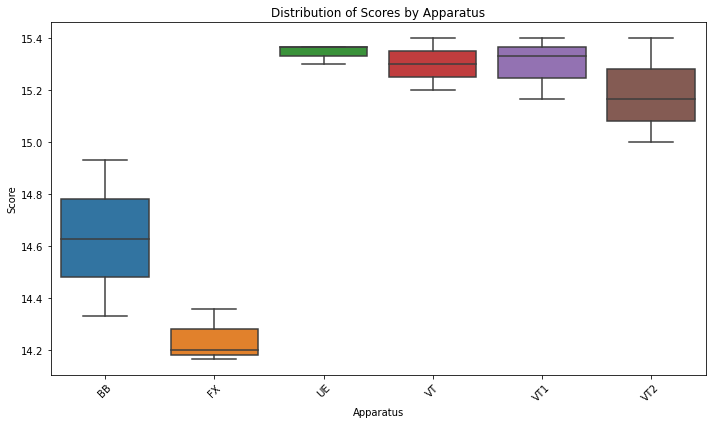

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Apparatus', y='Score', data=top_three)
plt.xlabel('Apparatus')
plt.ylabel('Score')
plt.title('Distribution of Scores by Apparatus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


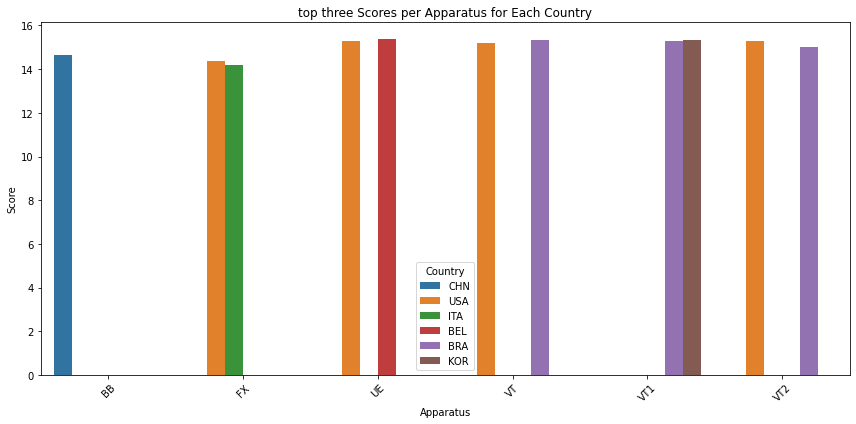

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_three, x='Apparatus', y='Score', hue='Country', ci=None)
plt.xlabel('Apparatus')
plt.ylabel('Score')
plt.title('top three Scores per Apparatus for Each Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

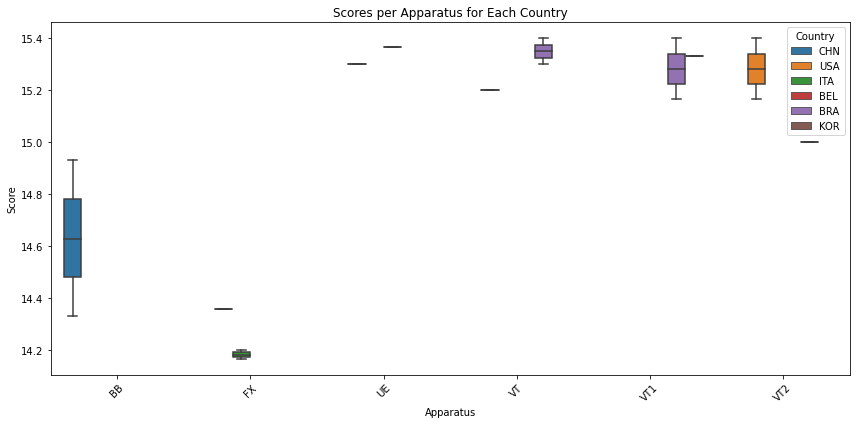

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_three, x='Apparatus', y='Score', hue='Country')
plt.xlabel('Apparatus')
plt.ylabel('Score')
plt.title('Scores per Apparatus for Each Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()


### Define team composition rules


In [4]:
team_size = 5
max_athletes_per_country = 3

### Select athletes from the USA


In [5]:
usa_athletes = df[df['Country'] == 'USA']


### Dynamic programming approach (Knapsack Problem)


In [6]:
def knapsack(items, limit):
    n = len(items)
    dp = np.zeros((n + 1, limit + 1))

    for i in range(1, n + 1):
        for w in range(1, limit + 1):
            name, score = items[i - 1]
            if score <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - score] + score)
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][limit]

### Create a list of athlete scores as tuples (name, score, country)


In [7]:
athlete_scores = [(name, score, country) for name, score, country in usa_athletes[['Name', 'Total_Score', 'Country']].values]


### Define optimization criteria


In [8]:
optimization_criteria = ['Total_Score', 'Gold_Medals']

### Create a function to select the best team based on criteria


In [9]:
def select_best_team(df, criteria, num_athletes):
    if criteria == 'Total_Score':
        best_team = df.nlargest(num_athletes, 'Total_Score')
    elif criteria == 'Gold_Medals':
        best_team = df.nlargest(num_athletes, 'Gold_Medals')
    return best_team

### Define the number of events


In [10]:
num_events = 4

### Store results for different team compositions and criteria


In [11]:
results = []

### Iterate through optimization criteria


In [12]:
for criteria in optimization_criteria:
    
    # Select athletes based on criteria and composition rules
    selected_team = select_best_team(df, criteria, num_athletes=team_size)
    
    # Simulate medal count for each event
    event_medal_count = {event: {'Gold': 0, 'Silver': 0,
                                 'Bronze': 0} for event in range(1, num_events + 1)}
    for event in range(1, num_events + 1):
        event_scores = {}
        for gymnast, _, _ in selected_team[['Name', 'Total_Score', 
                                            'Country']].values:
            
            # Simulate a random score between 13 and 16
            score = random.uniform(13, 16)
            event_scores[gymnast] = score
        
        sorted_gymnasts = sorted(event_scores.items(), key=lambda x: x[1], reverse=True)
        
        # Distribute medals
        for i, (gymnast, score) in enumerate(sorted_gymnasts):
            if i == 0:
                medal = 'Gold'
            elif i == 1:
                medal = 'Silver'
            elif i == 2:
                medal = 'Bronze'
            else:
                break
            
            event_medal_count[event][medal] += 1
    
    # Store the results for this criteria and team composition
    results.append({'Criteria': criteria, 'Team': selected_team,
                    'Medal_Count': event_medal_count})


### Analyze and print the results


In [13]:

for result in results:
    print(f"Team Composition based on {result['Criteria']}:\n")
    print(result['Team'][['Name', 'Country', 'Total_Score', 'Gold_Medals']])
    print("\nMedal Count in Different Events:")
    for event, medals in result['Medal_Count'].items():
        print(f"Event {event}: Gold - {medals['Gold']}, Silver - {medals['Silver']}, Bronze - {medals['Bronze']}")
    print("\n")


Team Composition based on Total_Score:

              Name Country  Total_Score  Gold_Medals
36  Rebeca ANDRADE     BRA       15.300          4.0
39  Rebeca ANDRADE     BRA       15.166          4.0
62    Simone BILES     USA       15.100          2.0
60    Simone BILES     USA       14.966          2.0
61    Simone BILES     USA       14.966          2.0

Medal Count in Different Events:
Event 1: Gold - 1, Silver - 1, Bronze - 0
Event 2: Gold - 1, Silver - 1, Bronze - 0
Event 3: Gold - 1, Silver - 1, Bronze - 0
Event 4: Gold - 1, Silver - 1, Bronze - 0


Team Composition based on Gold_Medals:

              Name Country  Total_Score  Gold_Medals
26  Rebeca ANDRADE     BRA          NaN          4.0
27  Rebeca ANDRADE     BRA          NaN          4.0
28  Rebeca ANDRADE     BRA          NaN          4.0
29  Rebeca ANDRADE     BRA       13.666          4.0
30  Rebeca ANDRADE     BRA          NaN          4.0

Medal Count in Different Events:
Event 1: Gold - 1, Silver - 0, Bronze - 0
Even

In [14]:

    
# Create a list of dictionaries to store the results
final_results = []
for result in results:
    criteria = result['Criteria']
    for event, medals in result['Medal_Count'].items():
        for medal, count in medals.items():
            final_results.append({'Criteria': criteria, 'Event': event, 'Medal': medal, 'Count': count})

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(final_results)

# Display the results DataFrame
print(results_df)


       Criteria  Event   Medal  Count
0   Total_Score      1    Gold      1
1   Total_Score      1  Silver      1
2   Total_Score      1  Bronze      0
3   Total_Score      2    Gold      1
4   Total_Score      2  Silver      1
5   Total_Score      2  Bronze      0
6   Total_Score      3    Gold      1
7   Total_Score      3  Silver      1
8   Total_Score      3  Bronze      0
9   Total_Score      4    Gold      1
10  Total_Score      4  Silver      1
11  Total_Score      4  Bronze      0
12  Gold_Medals      1    Gold      1
13  Gold_Medals      1  Silver      0
14  Gold_Medals      1  Bronze      0
15  Gold_Medals      2    Gold      1
16  Gold_Medals      2  Silver      0
17  Gold_Medals      2  Bronze      0
18  Gold_Medals      3    Gold      1
19  Gold_Medals      3  Silver      0
20  Gold_Medals      3  Bronze      0
21  Gold_Medals      4    Gold      1
22  Gold_Medals      4  Silver      0
23  Gold_Medals      4  Bronze      0


In [15]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Criteria  24 non-null     object
 1   Event     24 non-null     int64 
 2   Medal     24 non-null     object
 3   Count     24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 896.0+ bytes


In [16]:
results_df.corr()

,Event,Count
Event,1.000000e+00,-1.075765e-16
Count,-1.075765e-16,1.000000e+00
